<p align="center">
<FONT FACE="times new roman" SIZE=5>

<i><b>Docente:</b> Darwin Martinez.</i>
<br>
<i><b>Asignatura:</b> Introducción a sistemas inteligentes</i>
<br>
<i><b>Estudiantes:</b> Mitchell Bermin, Andrea Terraza, Miguel Thomas</i>
<br>
<i><b>Grupo:</b> Kyogai</i>
<i>9/04/24</i>
<br>
</FONT>
</p>

* Primer Conjunto de datos: Recaudo Aporte Voluntario Impuesto Predial
    * Numero de datos (Filas): 91
    * Columnas: 6
        * Año Presentacion: Año en el que se hizo el reporte
        * Concepto_impuesto: Tipo de impuesto en el que se contribuyo
        * Estrato: Estrato
        * No CONTRIBUYENTES: numero de personas que contribuyeron
        * Valor: Valor total contribuido




In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Cargar el conjunto de datos
url = 'C2_Kyogai_Taller_Regresion_y_regularizacion/Aporte voluntario de impuesto predial.csv'
aporte_dataset = pd.read_csv(url, encoding="latin1", delimiter=";")

aporte_dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C2_Kyogai_Taller_Regresion_y_regularizacion/Aporte voluntario de impuesto predial.csv'

In [ ]:
features_to_normalize = ['No CONTRIBUYENTES', 'VALOR APORTE VOLUNTARIO']

# Crear el objeto StandardScaler y ajustarlo a las características seleccionadas
scaler = StandardScaler()
aporte_dataset[features_to_normalize] = scaler.fit_transform(aporte_dataset[features_to_normalize])

# Mostrar los primeros registros del conjunto de datos escalado
aporte_dataset.head()

,ID,A¥O PRESENTACION,CONCEPTO_IMPUESTO,ESTRATO,No CONTRIBUYENTES,VALOR APORTE VOLUNTARIO
0,1,2006,PREDIAL,0,0.036751,1.290349
1,2,2006,PREDIAL,1,-0.280465,-1.242269
2,3,2006,PREDIAL,2,3.341330,-0.383260
3,4,2006,PREDIAL,3,3.592935,1.944601
4,5,2006,PREDIAL,4,1.367611,1.679172


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(aporte_dataset.iloc[:, 0:5], aporte_dataset.iloc[:, -1], test_size=0.2, random_state=42)

In [ ]:
def modelo_regression(var_train,y_train,var_test,y_test, alpha,modelo):

    if modelo == 'ridge':
        reg = Ridge(alpha=alpha)
    elif modelo == 'lasso':
        reg = Lasso(alpha=alpha)
    elif modelo == 'elastic_net':
        reg = ElasticNet(alpha=alpha,l1_ratio=0.5)
    else:
        raise ValueError("Debe ser 'ridge', 'lasso' o 'elastic_net'.")

    reg.fit(var_train, y_train)
    y_pred = reg.predict(var_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
#variables independiente/s
predictors=X_train[['ESTRATO','No CONTRIBUYENTES']]
predictors_test= X_test[['ESTRATO','No CONTRIBUYENTES']]

#diferentes valores de alpha para los 3 modelos
alphas= [0.001,0.01,0.1,0.3,0.5, 1, 10, 20,30,40,100,1000,10000,100000,10000000]

#arreglos para los mse de cada modelo
result_ridge = []
result_lasso = []
result_elastic = []



In [ ]:
for i in range(len(alphas)):
    #cargar los mse por cada lambda en los arreglos, dependiendo del modelo
    result_ridge.append((f'alpha_{alphas[i]} ',
                         modelo_regression(predictors, y_train, predictors_test,y_test,alphas[i],'ridge')))
    result_lasso.append((f'alpha_{alphas[i]} ',
                         modelo_regression(predictors, y_train, predictors_test,y_test,alphas[i],'lasso')))
    result_elastic.append((f'alpha_{alphas[i]} ',
                         modelo_regression(predictors, y_train, predictors_test,y_test,alphas[i],'elastic_net')))


In [ ]:
result_ridge

[('alpha_0.001 ', 0.8218133077978587),
 ('alpha_0.01 ', 0.8218185420107349),
 ('alpha_0.1 ', 0.8218708311753001),
 ('alpha_0.3 ', 0.8219866847300586),
 ('alpha_0.5 ', 0.8221020634266695),
 ('alpha_1 ', 0.8223884364990912),
 ('alpha_10 ', 0.8270530745191647),
 ('alpha_20 ', 0.8312510075817939),
 ('alpha_30 ', 0.8345945193282676),
 ('alpha_40 ', 0.8372572716029637),
 ('alpha_100 ', 0.8451208763890807),
 ('alpha_1000 ', 0.8434707041653815),
 ('alpha_10000 ', 0.840913150111967),
 ('alpha_100000 ', 0.8406669425089909),
 ('alpha_10000000 ', 0.8406405866180812)]

In [ ]:
result_lasso

[('alpha_0.001 ', 0.8219578963126096),
 ('alpha_0.01 ', 0.8234257161855525),
 ('alpha_0.1 ', 0.8538712189282363),
 ('alpha_0.3 ', 0.8565315258096318),
 ('alpha_0.5 ', 0.840640321232378),
 ('alpha_1 ', 0.840640321232378),
 ('alpha_10 ', 0.840640321232378),
 ('alpha_20 ', 0.840640321232378),
 ('alpha_30 ', 0.840640321232378),
 ('alpha_40 ', 0.840640321232378),
 ('alpha_100 ', 0.840640321232378),
 ('alpha_1000 ', 0.840640321232378),
 ('alpha_10000 ', 0.840640321232378),
 ('alpha_100000 ', 0.840640321232378),
 ('alpha_10000000 ', 0.840640321232378)]

In [ ]:
result_elastic

[('alpha_0.001 ', 0.8219057234535851),
 ('alpha_0.01 ', 0.8227865808103851),
 ('alpha_0.1 ', 0.8353767852519104),
 ('alpha_0.3 ', 0.882235186996137),
 ('alpha_0.5 ', 0.8640180446777478),
 ('alpha_1 ', 0.840640321232378),
 ('alpha_10 ', 0.840640321232378),
 ('alpha_20 ', 0.840640321232378),
 ('alpha_30 ', 0.840640321232378),
 ('alpha_40 ', 0.840640321232378),
 ('alpha_100 ', 0.840640321232378),
 ('alpha_1000 ', 0.840640321232378),
 ('alpha_10000 ', 0.840640321232378),
 ('alpha_100000 ', 0.840640321232378),
 ('alpha_10000000 ', 0.840640321232378)]

In [ ]:
alphas_ridge, mses_ridge = zip(*result_ridge)
alphas_lasso, mses_lasso = zip(*result_lasso)
alphas_elastic, mses_elastic = zip(*result_elastic)

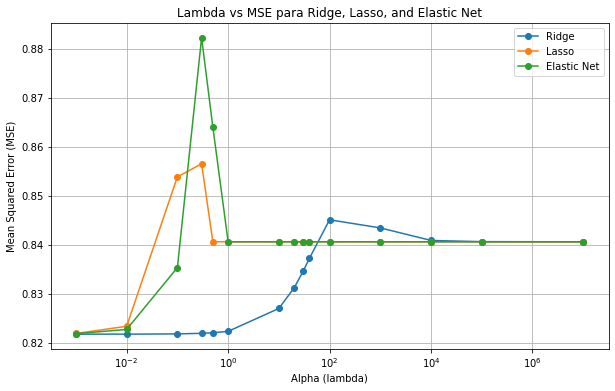

In [ ]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(alphas, mses_ridge, marker='o', label='Ridge')
plt.plot(alphas, mses_lasso, marker='o',  label='Lasso')
plt.plot(alphas, mses_elastic, marker='o',  label='Elastic Net')
plt.xlabel('Alpha (lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lambda vs MSE para Ridge, Lasso, and Elastic Net')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

__Conclusion:__
- En las regresiones de Lasso y Elastic Net, se observa un notable incremento en el MSE hasta alcanzar un valor de alpha de 0.5. Este fenómeno se debe a la tendencia de ambos métodos a reducir los coeficientes de ciertas variables directamente a cero, lo que resulta en la eliminación de estas del modelo. Esta eliminación de variables conlleva a que, en cierto punto, el modelo pierda características importantes, lo que puede llevar a un subajuste. No obstante, se aprecia que existe un umbral alrededor de alpha = 1, donde el MSE se estabiliza. Este efecto se debe a que, para estos valores de alpha, el modelo ya ha eliminado las variables que podían ser reducidas a cero, resultando en un modelo considerablemente más simplificado.

- Por otro lado, la regresión Ridge muestra una tendencia diferente. A medida que alpha aumenta, también lo hace el MSE, lo que indica una simplificación progresiva del modelo. Esto significa que el modelo está ajustándose menos a los datos de entrenamiento, lo cual podría ser beneficioso para mejorar las predicciones en nuevos conjuntos de datos, al evitar el sobreajuste. Sin embargo, es importante señalar que, cuando el valor de alpha es excesivamente alto, la regresión Ridge puede caer en el subajuste. Esto se debe a que una penalización exagerada puede conducir a que todos los coeficientes se aproximen demasiado a cero, perdiendo así la capacidad del modelo de capturar adecuadamente las relaciones subyacentes en los datos.